In [12]:
import pandas as pd
from geopy.distance import geodesic
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../results/NN-Eval.csv')
df

,Image,Location,Type,Notes,Best Match 1,Best Match 2,Predicted Location,Issues
0,iss065e012968,"23.742209, 120.791696",night,Taiwan,NaN,NaN,NaN,Match not found.
1,iss065e012854,"24.399968, 39.580929","city, desert","Medina, Saudi Arabia","24.243869682062538, 34.50965802339215","23.575597653538267, 31.96061662545327","23.909733667800403, 33.23513732442271",NaN
2,iss065e012122,"21.916841, 17.409515","mountains, desert","Tibesti Mountains, Chad","21.859068677152404, 9.468757021178105","22.869221341312457, 11.471575262415776","22.36414500923243, 10.470166141796941",NaN
3,iss040e092721,"37.901332, 15.333352","volcano, island",Mount Etna and Sicily,"37.99098385053961, 16.621670698969467","37.99098385053961, 14.983001228865902","37.99098385053961, 15.802335963917685",NaN
4,iss040e125148,"51.959667, 4.072454",port,Maasvlakte Rotterdam,"52.16862486467835, 4.377214208934959","51.264086859953494, 3.102693509965519","51.71635586231592, 3.739953859450239",NaN
...,...,...,...,...,...,...,...,...
139,iss056e126635,"22.511201, 32.948643",NaN,"Lake Nasser, Egypt","23.467633252740086, 34.45256236563611","23.299183131042493, 31.72144658213017","23.38340819189129, 33.08700447388314",NaN
140,iss036e049939,"-3.061136, 37.352760",volcano,"Mount Kilimanjaro, Tanzania","-1.4807118710086793, 35.69675412439839","-3.117553993689355, 36.42505166666665","-2.299132932349017, 36.06090289553252",NaN
141,iss057e114906,"33.245924, -119.475401",island,"San Nicolas Island, California",NaN,NaN,NaN,Match not found.
142,iss055e114459,"-17.620422, 139.094148",NaN,"Gulf of Carpentaria, Australia","-21.388845411417968, 139.35405069896947","-21.55756514109225, 137.35123245773178","-21.47320527625511, 138.35264157835064",NaN


In [3]:
def calculate_distance(coord1, coord2):
    """
    Calculate distance between two coordinates
    """
    try:
        return geodesic(coord1, coord2).km
    except:
        return np.nan

def extract_coordinates(coord_string):
    """
    Extract coordinates from a string
    """
    if pd.isna(coord_string):
        return np.nan, np.nan
    coords = coord_string.split(", ")
    return float(coords[0]), float(coords[1])

# Extract coordinates for actual location, best match 1, best match 2, and predicted location
df['Location_coords'] = df['Location'].apply(lambda x: extract_coordinates(x))
df['Best_Match_1_coords'] = df['Best Match 1'].apply(lambda x: extract_coordinates(x))
df['Best_Match_2_coords'] = df['Best Match 2'].apply(lambda x: extract_coordinates(x))
df['Predicted_Location_coords'] = df['Predicted Location'].apply(lambda x: extract_coordinates(x))

# Calculate distances
df['Error_Best_Match_1'] = df.apply(lambda x: calculate_distance(x['Location_coords'], x['Best_Match_1_coords']), axis=1)
df['Error_Best_Match_2'] = df.apply(lambda x: calculate_distance(x['Location_coords'], x['Best_Match_2_coords']), axis=1)
df['Error_Predicted_Location'] = df.apply(lambda x: calculate_distance(x['Location_coords'], x['Predicted_Location_coords']), axis=1)

df

,Image,Location,Type,Notes,Best Match 1,Best Match 2,Predicted Location,Issues,Location_coords,Best_Match_1_coords,Best_Match_2_coords,Predicted_Location_coords,Error_Best_Match_1,Error_Best_Match_2,Error_Predicted_Location
0,iss065e012968,"23.742209, 120.791696",night,Taiwan,NaN,NaN,NaN,Match not found.,"(23.742209, 120.791696)","(nan, nan)","(nan, nan)","(nan, nan)",NaN,NaN,NaN
1,iss065e012854,"24.399968, 39.580929","city, desert","Medina, Saudi Arabia","24.243869682062538, 34.50965802339215","23.575597653538267, 31.96061662545327","23.909733667800403, 33.23513732442271",NaN,"(24.399968, 39.580929)","(24.243869682062538, 34.50965802339215)","(23.575597653538267, 31.96061662545327)","(23.909733667800403, 33.23513732442271)",514.980654,780.705846,647.144176
2,iss065e012122,"21.916841, 17.409515","mountains, desert","Tibesti Mountains, Chad","21.859068677152404, 9.468757021178105","22.869221341312457, 11.471575262415776","22.36414500923243, 10.470166141796941",NaN,"(21.916841, 17.409515)","(21.859068677152404, 9.468757021178105)","(22.869221341312457, 11.471575262415776)","(22.36414500923243, 10.470166141796941)",820.555766,620.439067,717.510816
3,iss040e092721,"37.901332, 15.333352","volcano, island",Mount Etna and Sicily,"37.99098385053961, 16.621670698969467","37.99098385053961, 14.983001228865902","37.99098385053961, 15.802335963917685",NaN,"(37.901332, 15.333352)","(37.99098385053961, 16.621670698969467)","(37.99098385053961, 14.983001228865902)","(37.99098385053961, 15.802335963917685)",113.674335,32.362486,42.406126
4,iss040e125148,"51.959667, 4.072454",port,Maasvlakte Rotterdam,"52.16862486467835, 4.377214208934959","51.264086859953494, 3.102693509965519","51.71635586231592, 3.739953859450239",NaN,"(51.959667, 4.072454)","(52.16862486467835, 4.377214208934959)","(51.264086859953494, 3.102693509965519)","(51.71635586231592, 3.739953859450239)",31.263496,102.476481,35.469755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,iss056e126635,"22.511201, 32.948643",NaN,"Lake Nasser, Egypt","23.467633252740086, 34.45256236563611","23.299183131042493, 31.72144658213017","23.38340819189129, 33.08700447388314",NaN,"(22.511201, 32.948643)","(23.467633252740086, 34.45256236563611)","(23.299183131042493, 31.72144658213017)","(23.38340819189129, 33.08700447388314)",187.068690,153.186047,97.627907
140,iss036e049939,"-3.061136, 37.352760",volcano,"Mount Kilimanjaro, Tanzania","-1.4807118710086793, 35.69675412439839","-3.117553993689355, 36.42505166666665","-2.299132932349017, 36.06090289553252",NaN,"(-3.061136, 37.35276)","(-1.4807118710086793, 35.69675412439839)","(-3.117553993689355, 36.42505166666665)","(-2.299132932349017, 36.06090289553252)",253.905981,103.311463,166.539735
141,iss057e114906,"33.245924, -119.475401",island,"San Nicolas Island, California",NaN,NaN,NaN,Match not found.,"(33.245924, -119.475401)","(nan, nan)","(nan, nan)","(nan, nan)",NaN,NaN,NaN
142,iss055e114459,"-17.620422, 139.094148",NaN,"Gulf of Carpentaria, Australia","-21.388845411417968, 139.35405069896947","-21.55756514109225, 137.35123245773178","-21.47320527625511, 138.35264157835064",NaN,"(-17.620422, 139.094148)","(-21.388845411417968, 139.35405069896947)","(-21.55756514109225, 137.35123245773178)","(-21.47320527625511, 138.35264157835064)",418.049484,472.626432,433.536458


In [10]:


# Calculate error rates
error_rate_best_match_1 = df['Error_Best_Match_1'].mean()
error_rate_best_match_2 = df['Error_Best_Match_2'].mean()
error_rate_predicted_location = df['Error_Predicted_Location'].mean()

# Analysis of issues
issue_counts = df['Issues'].value_counts()

print("Error rate for best match 1: {:.2f} km".format(error_rate_best_match_1))
print("Error rate for best match 2: {:.2f} km".format(error_rate_best_match_2))
print("Error rate for predicted location: {:.2f} km".format(error_rate_predicted_location))
print(issue_counts)

Error rate for best match 1: 339.26 km
Error rate for best match 2: 337.68 km
Error rate for predicted location: 330.52 km
Issues
Match not found.                                         33
GPS data is incomplete or not available in the image.     2
Only one match found.                                     1
Name: count, dtype: int64


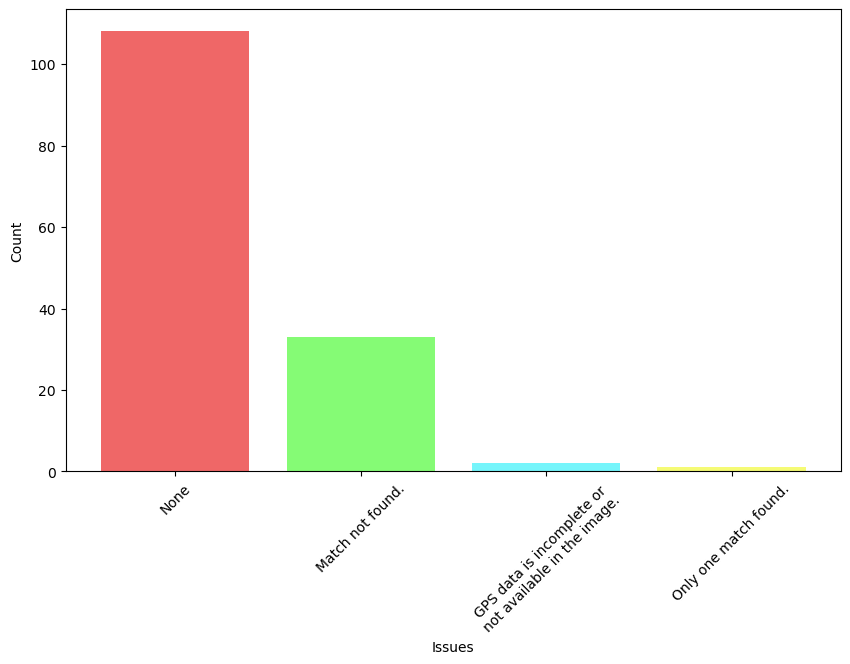

In [22]:
issue_counts = {
    "None": 108,
    "Match not found.": 33,
    "GPS data is incomplete or\nnot available in the image.": 2,
    "Only one match found.": 1
}

# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(issue_counts.keys(), issue_counts.values(), color=['#EF6767', '#85FB75', '#75F5FB', '#F5FB75'])
plt.xlabel('Description of Issues')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

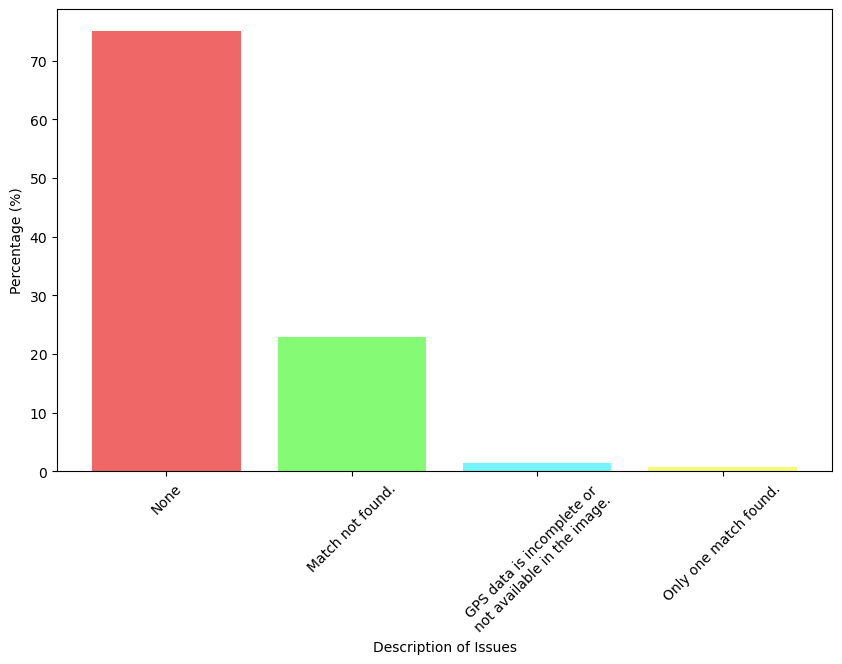

In [23]:
# Calculating percentages
total_issues = sum(issue_counts.values())
issue_percentages = {k: (v / total_issues) * 100 for k, v in issue_counts.items()}

# Creating the bar graph with percentages
plt.figure(figsize=(10, 6))
plt.bar(issue_percentages.keys(), issue_percentages.values(), color=['#EF6767', '#85FB75', '#75F5FB', '#F5FB75'])
plt.xlabel('Description of Issues')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

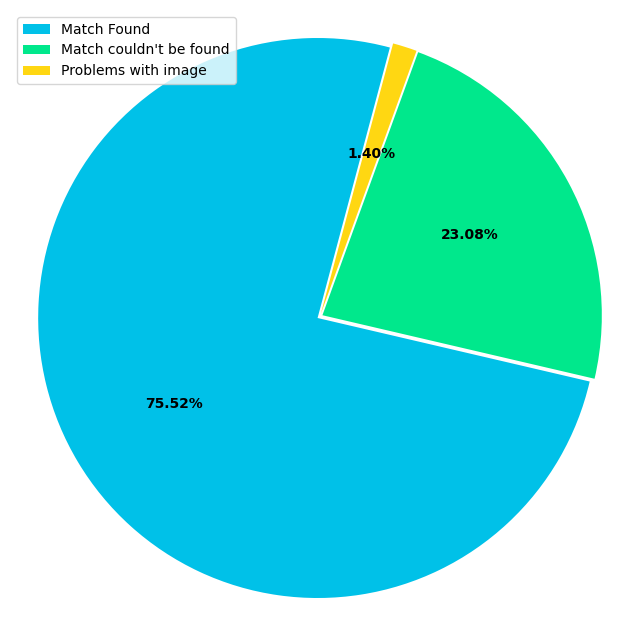

In [65]:
# Grouping "Match not found.", "GPS data is incomplete or not available in the image.", and "Only one match found." into one category
grouped_issues = {
    "Match Found": issue_counts["None"],
    "Match couldn't be found": issue_counts["Match not found."], 
     "Problems with image": issue_counts["GPS data is incomplete or\nnot available in the image."]
}

# Colors for the pie chart
colors = ['#00C1E8', '#00E88C', '#FFD712']

# Creating the pie chart
plt.figure(figsize=(8, 8))
_, _, autotexts = plt.pie(grouped_issues.values(), colors=colors,  autopct='%.2f%%', startangle=75, explode=(0.01, 0.01, 0.01))
for autotext in autotexts:
    autotext.set_weight('bold')
plt.legend(grouped_issues.keys(), loc="upper left")
plt.axis('equal')
plt.show()

In [ ]:
def calculate_lat_long_error(coord1, coord2):
    """
    Calculate the difference in latitude and longitude between two coordinates.
    """
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    # Calculate differences
    lat_error = abs(lat1 - lat2)
    lon_error = abs(lon1 - lon2)
    
    return lat_error, lon_error

